In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from datetime import datetime

In [2]:
# transfers_df = pd.read_csv('../data/1_year/combined_transfers_1_year.csv')
transfers_df = pd.read_csv('../data/1_year/reduced_transfers_1_year.csv')

In [3]:
transfers_df.groupby('token').size()

token
AAVE         575248
ArbAAVE      238703
ArbCOMP      104513
COMP         162112
PolAAVE     2430318
PolCOMP      107658
aArbUSDC     500104
aArbUSDT     300707
aArbWETH     719292
aEthUSDC      53702
aEthUSDT      38832
aEthWETH     183654
aPolUSDC     217572
aPolUSDT     300143
aPolWETH     240754
cArbUSDC      86222
cArbUSDT      20338
cArbWETH      20106
cPolUSDT       2177
cUSDCv3       13375
cUSDTv3        1230
cWETHv3        5646
dtype: int64

In [6]:
df_melted = pd.melt(transfers_df, id_vars=['token'], value_vars=['from', 'to'], value_name='address')
df_melted.groupby('token')['address'].nunique()

token
AAVE        112797
ArbAAVE      12951
ArbCOMP      19580
COMP         45561
PolAAVE      68147
PolCOMP      10779
aArbUSDC     39838
aArbUSDT     18687
aArbWETH     61722
aEthUSDC      8836
aEthUSDT      6548
aEthWETH     22019
aPolUSDC     11832
aPolUSDT     19114
aPolWETH     17602
cArbUSDC     35792
cArbUSDT      9385
cArbWETH      9419
cPolUSDT       513
cUSDCv3       3118
cUSDTv3        377
cWETHv3       2134
Name: address, dtype: int64

In [3]:
gov_aave_tokens = ['AAVE', 'ArbAAVE', 'PolAAVE']
gov_comp_tokens = ['COMP', 'ArbCOMP', 'PolCOMP']
oth_aave_tokens = ['aEthWETH', 'aEthUSDT', 'aEthUSDC', 'aPolWETH', 'aPolUSDC', 'aPolUSDT', 'aArbWETH', 'aArbUSDC', 'aArbUSDT']
oth_comp_tokens = ['cWETHv3', 'cUSDTv3', 'cUSDCv3', 'cPolUSDT', 'cArbWETH', 'cArbUSDC', 'cArbUSDT']

In [4]:
len(transfers_df)

6322406

In [6]:
def analyze_subset(tokens, df):
    subset_df = df[df['token'].isin(tokens)]
    entry_count = len(subset_df)
    unique_addresses = pd.unique(subset_df[['from', 'to']].values.ravel('K'))
    return entry_count, len(unique_addresses)

entry_count1, unique_count1 = analyze_subset(gov_aave_tokens, transfers_df)
entry_count2, unique_count2 = analyze_subset(gov_comp_tokens, transfers_df)
entry_count3, unique_count3 = analyze_subset(oth_aave_tokens, transfers_df)
entry_count4, unique_count4 = analyze_subset(oth_comp_tokens, transfers_df)

print(f"AAVE tokens - Entries: {entry_count1}, Unique Addresses: {unique_count1}")
print(f"COMP tokens - Entries: {entry_count2}, Unique Addresses: {unique_count2}")
print(f"aTokens - Entries: {entry_count3}, Unique Addresses: {unique_count3}")
print(f"cTokens - Entries: {entry_count4}, Unique Addresses: {unique_count4}")

AAVE tokens - Entries: 3244269, Unique Addresses: 189402
COMP tokens - Entries: 374283, Unique Addresses: 74536
aTokens - Entries: 2554760, Unique Addresses: 156504
cTokens - Entries: 149094, Unique Addresses: 44783


In [ ]:
# token_subset = ['AAVE', 'PolAAVE', 'ArbAAVE', 'OptAAVE']

# filtered_df = transfers_df[transfers_df['token'].isin(token_subset)]

# df_melted = pd.melt(filtered_df, id_vars=['token'], value_vars=['from', 'to'], value_name='address')
# df_melted['address'].nunique()

## Aave governance

In [ ]:
token_subset = ['AAVE', 'PolAAVE', 'ArbAAVE']

filtered_df = transfers_df[transfers_df['token'].isin(token_subset)]

G_aave = nx.Graph()

for _, row in filtered_df.iterrows():
    node1, node2 = row['from'], row['to']
    value = row['value']
    
    if G_aave.has_edge(node1, node2):
        G_aave[node1][node2]['value'] += value
    else:
        G_aave.add_edge(node1, node2, value=value)

In [8]:
len(filtered_df)

3244269

In [9]:
print(len(G_aave.edges), len(G_aave.nodes))

322450 189402


In [10]:
aave_degrees = dict(G_aave.degree())
max(aave_degrees, key=aave_degrees.get)

'0xa9077cdb3d13f45b8b9d87c43e11bce0e73d8631'

In [11]:
aave_degree_list = sorted(G_aave.degree, key=lambda x: x[1], reverse=True)
aave_df = pd.DataFrame(aave_degree_list, columns=['address', 'degree'])

for i, j in aave_df.iterrows():
    if i < 100:
        print(j['address'], j['degree'])
    else:
        break

0xa9077cdb3d13f45b8b9d87c43e11bce0e73d8631 11547
0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43 11321
0x51c72848c68a965f66fa7a88855f9f7784502a7f 10598
0x28c6c06298d514db089934071355e5743bf21d60 10126
0xdef171fe48cf0115b1d80b88dc8eab59176fee57 9318
0x4da27a545c0c5b758a6ba100e3a049001de870f5 6602
0xb3866eb993e1aef93f219c3da0a71c3f11becbf2 5852
0xa236278bec0e0677a48527340cfb567b4e6e9adc 5550
0x2aceda63b5e958c45bd27d916ba701bc1dc08f7a 5332
0x25f2226b597e8f9514b3f68f00f494cf4f286491 5216
0x21a31ee1afc51d94c2efccaa2092ad1028285549 5209
0xdfd5293d8e347dfe59e90efd55b2956a1343963d 5199
0xdfc14d2af169b0d36c4eff567ada9b2e0cae044f 5040
0xf329e36c7bf6e5e86ce2150875a84ce77f477375 4912
0xc590175e458b83680867afd273527ff58f74c02b 4813
0xdb6f1920a889355780af7570773609bd8cb1f498 4603
0xdd672b3b768a16b9bcb4ee1060d3e8221435beaa 4483
0x26a78d5b6d7a7aceedd1e6ee3229b372a624d8b7 4292
0xec7be89e9d109e7e3fec59c222cf297125fefda2 3568
0x5ab53ee1d50eef2c1dd3d5402789cd27bb52c1bb 3544
0xf89d7b9c864f589bbf53a82105107622b3

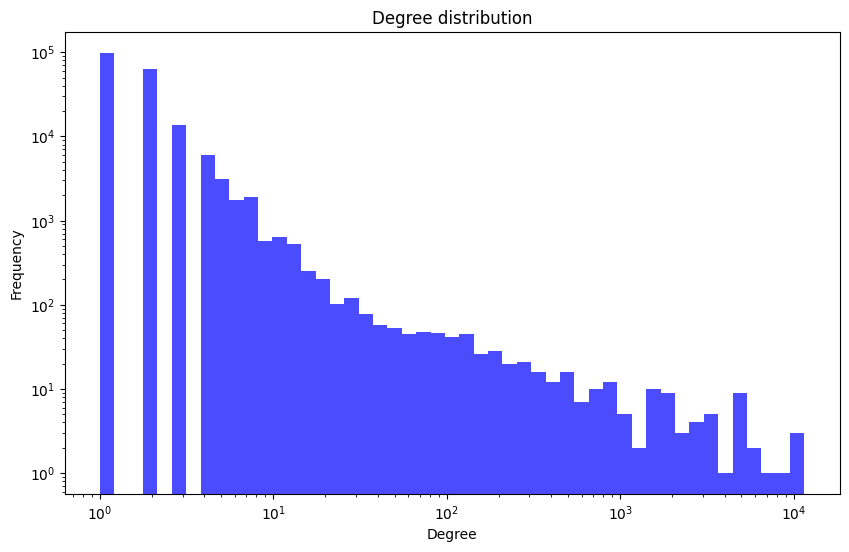

In [12]:
degrees = [G_aave.degree(n) for n in G_aave.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## Compound governance

In [14]:
token_subset = ['COMP', 'PolCOMP', 'ArbCOMP']

filtered_df = transfers_df[transfers_df['token'].isin(token_subset)]

G_comp = nx.Graph()

for _, row in filtered_df.iterrows():
    node1, node2 = row['from'], row['to']
    value = row['value']
    
    if G_comp.has_edge(node1, node2):
        G_comp[node1][node2]['value'] += value
    else:
        G_comp.add_edge(node1, node2, value=value)

In [15]:
len(filtered_df)

374283

In [16]:
print(len(G_comp.edges), len(G_comp.nodes))

113137 74536


In [17]:
comp_degree_list = sorted(G_comp.degree, key=lambda x: x[1], reverse=True)
comp_df = pd.DataFrame(comp_degree_list, columns=['address', 'degree'])

for i, j in comp_df.iterrows():
    if i < 100:
        print(j['address'], j['degree'])
    else:
        break

0xee3273f6d29ddfff08ffd9d513cff314734f01a2 9960
0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43 5511
0x1a899be2a7b69e47860eeeabaa6d06ebd9e82b00 4828
0xdfa19e743421c394d904f5a113121c2227d2364b 4228
0x28c6c06298d514db089934071355e5743bf21d60 3333
0x45939657d1ca34a8fa39a924b71d28fe8431e581 3314
0x88730d254a2f7e6ac8388c3198afd694ba9f7fae 3203
0xf89d7b9c864f589bbf53a82105107622b35eaa40 2431
0xdef171fe48cf0115b1d80b88dc8eab59176fee57 1992
0x1b0e765f6224c21223aea2af16c1c46e38885a40 1833
0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b 1667
0x6cc5f688a315f3dc28a7781717a9a798a59fda7b 1666
0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae 1641
0xdfd5293d8e347dfe59e90efd55b2956a1343963d 1507
0xc590175e458b83680867afd273527ff58f74c02b 1496
0x21a31ee1afc51d94c2efccaa2092ad1028285549 1455
0x495b3576e2f67fa870e14d0996433fbdb4015794 1452
0xba12222222228d8ba445958a75a0704d566bf2c8 1438
0xea4ba4ce14fdd287f380b55419b1c5b6c3f22ab6 1422
0xe37e799d5077682fa0a244d46e5649f71457bd09 1319
0xd7f1dd5d49206349cae8b585fcb0ce3d96f169

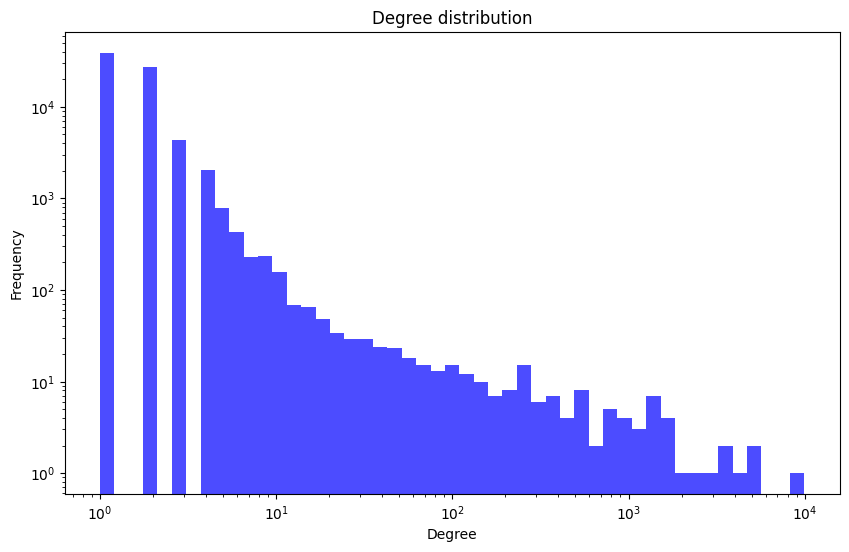

In [18]:
degrees = [G_comp.degree(n) for n in G_comp.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

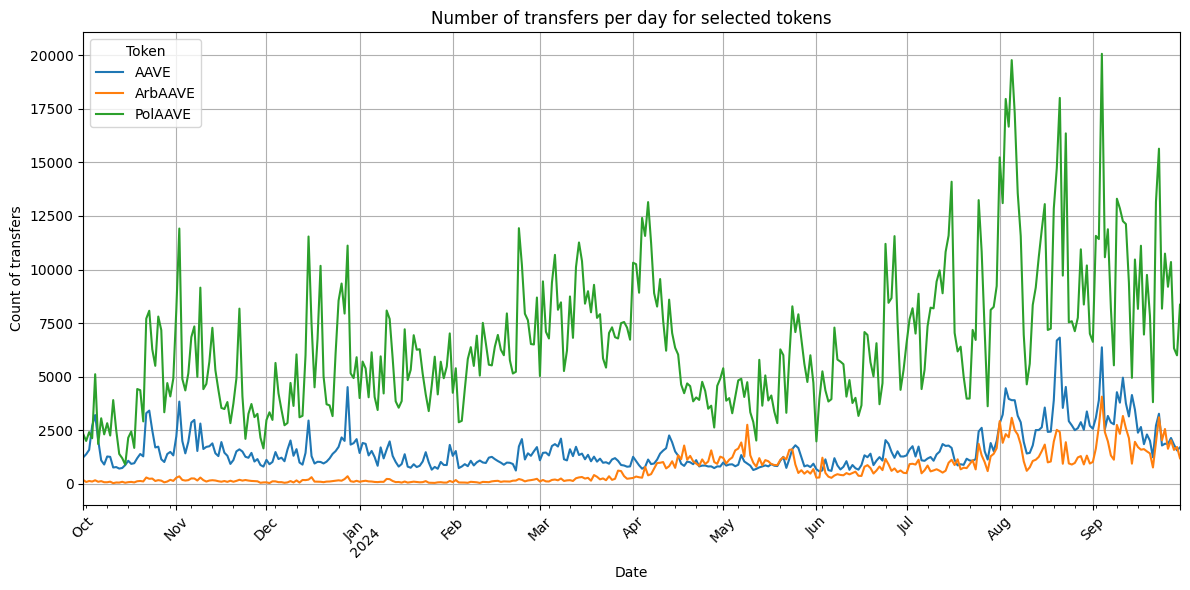

In [21]:
transfers_df['date'] = pd.to_datetime(transfers_df['date'])

tokens_to_plot = ['AAVE', 'PolAAVE', 'ArbAAVE']
# tokens_to_plot = ['COMP', 'PolCOMP', 'ArbCOMP']

df_filtered = transfers_df[transfers_df['token'].isin(tokens_to_plot)]

grouped_data = df_filtered.groupby(['date', 'token']).size().reset_index(name='count')

pivot_data = grouped_data.pivot(index='date', columns='token', values='count').fillna(0)

pivot_data.plot(kind='line', figsize=(12, 6))
plt.title("Number of transfers per day for selected tokens")
plt.xlabel("Date")
plt.ylabel("Count of transfers")
plt.legend(title='Token')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## aTokens/cTokens

In [22]:
aave_trading_tokens = ['aArbUSDC', 'aArbUSDT', 'aArbWETH', 'aEthUSDC', 'aEthUSDT', 'aEthWETH', 'aPolUSDC', 'aPolUSDT', 'aPolWETH']
comp_trading_tokens = ['cArbUSDC', 'cArbUSDT', 'cArbWETH', 'cPolUSDT', 'cUSDCv3', 'cUSDTv3', 'cWETHv3']

aave_trading_subset = transfers_df[transfers_df['token'].isin(aave_trading_tokens)]
comp_trading_subset = transfers_df[transfers_df['token'].isin(comp_trading_tokens)]

In [23]:
G_aave_trading = nx.MultiDiGraph()

for _, row in aave_trading_subset.iterrows():
    G_aave_trading.add_edge(row['from'], row['to'], key=row['timestamp'], value=row['value'], token=row['token'])

print('Part 2')

G_comp_trading = nx.MultiDiGraph()

for _, row in comp_trading_subset.iterrows():
    G_comp_trading.add_edge(row['from'], row['to'], key=row['timestamp'], value=row['value'], token=row['token'])

Part 2


In [15]:
print(len(aave_trading_subset), len(comp_trading_subset))

5948399 672698


In [24]:
print(len(G_aave_trading.edges), len(G_aave_trading.nodes))
print(len(G_comp_trading.edges), len(G_comp_trading.nodes))

2384701 156504
147296 44783


In [25]:
with open('../data/proposals/aave/aave_v2_on_chain_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_v2_proposals = json.load(file)['data']['proposals']
with open('../data/proposals/aave/aave_v3_on_chain_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_v3_proposals = json.load(file)['data']['proposals']
with open('../data/proposals/aave/aave_snapshot_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_snapshot_proposals = json.load(file)['data']['proposals']

with open('../data/proposals/aave/aave_snapshot_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_snapshot_votes = json.load(file)
with open('../data/proposals/aave/aave_v2_on_chain_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_v2_votes = json.load(file)
with open('../data/proposals/aave/aave_v3_on_chain_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_v3_votes = json.load(file)    
    
with open('../data/proposals/aave/aave_delegations.json', 'r', encoding='utf8') as file:
    aave_delegations = json.load(file)

In [ ]:
nx.degree_assortativity_coefficient(G_aave_trading)

In [ ]:
# nx.degree_centrality

In [ ]:
G_aave_simple = nx.Graph(G_aave_trading)

average_clustering = nx.average_clustering(G_aave_simple)

In [ ]:
# nx.number_connected_components(G_aave_simple)
nx.omega(G_aave_simple)

In [27]:
# All nodes
average_degrees = np.array([G_aave_trading.degree(n) for n in G_aave_trading.nodes()])
average_in_degrees = np.array([G_aave_trading.in_degree(n) for n in G_aave_trading.nodes()])
average_out_degrees = np.array([G_aave_trading.out_degree(n) for n in G_aave_trading.nodes()])

# Proposers
proposers = []

for proposal in aave_v2_proposals:
    proposer = proposal['user']['id']
    if not proposer in proposers:
        proposers.append(proposer)

for proposal in aave_v3_proposals:
    creator = proposal['creator']
    if not creator in proposers:
        proposers.append(creator)

# for proposal in aave_snapshot_proposals:
#     author = proposal['author'].lower()
#     if not author in proposers:
#         proposers.append(author)
    
proposer_degrees = [G_aave_trading.degree(n) for n in proposers]
proposer_degrees = np.array([d if not isinstance(d, type(G_aave_trading.degree())) else 0 for d in proposer_degrees])
# proposer_degrees = [d for d in proposer_degrees if not isinstance(d, type(G_aave_trading.degree()))]
proposer_in_degrees = [G_aave_trading.in_degree(n) for n in proposers]
proposer_in_degrees = np.array([d if not isinstance(d, type(G_aave_trading.in_degree())) else 0 for d in proposer_in_degrees])
proposer_out_degrees = [G_aave_trading.out_degree(n) for n in proposers]
proposer_out_degrees = np.array([d if not isinstance(d, type(G_aave_trading.out_degree())) else 0 for d in proposer_out_degrees])

# Voters
voters = []

for proposal in aave_v2_votes:
    for vote in proposal['votes']:
        voter = vote['id'].split('-')[0]
        if not voter in voters:
            voters.append(voter)
            
for proposal in aave_v3_votes:
    for vote in proposal['votes']:
        voter = vote['voter'].lower()
        if not voter in voters:
            voters.append(voter)

# for proposal in aave_snapshot_votes:
#     for vote in proposal['votes']:
#         voter = vote['voter'].lower()
#         if not voter in voters:
#             voters.append(voter)
    
voter_degrees = [G_aave_trading.degree(n) for n in voters]
voter_degrees = np.array([d if not isinstance(d, type(G_aave_trading.degree())) else 0 for d in voter_degrees])
# voter_degrees = [d for d in voter_degrees if not isinstance(d, type(G_aave_trading.degree()))]
voter_in_degrees = [G_aave_trading.in_degree(n) for n in voters]
voter_in_degrees = np.array([d if not isinstance(d, type(G_aave_trading.in_degree())) else 0 for d in voter_in_degrees])
voter_out_degrees = [G_aave_trading.out_degree(n) for n in voters]
voter_out_degrees = np.array([d if not isinstance(d, type(G_aave_trading.out_degree())) else 0 for d in voter_out_degrees])

# Delegates
delegators = []
delegatees = []
aave_delegations = [
    entry for entry in aave_delegations
    if 1696118399 < entry.get('timestamp', 0) < 1727740800
]

for delegate in aave_delegations:
    delegator = delegate['from'].lower()
    delegatee = delegate['to'].lower()
    
    if not delegator in delegators:
        delegators.append(delegator)
        
    if not delegatee in delegatees and not delegatee == '0x0000000000000000000000000000000000000000':
        delegatees.append(delegatee)        
    
delegator_degrees = [G_aave_trading.degree(n) for n in delegators]
delegator_degrees = np.array([d if not isinstance(d, type(G_aave_trading.degree())) else 0 for d in delegator_degrees])
# delegator_degrees = [d for d in delegator_degrees if not isinstance(d, type(G_aave_trading.degree()))]
delegator_in_degrees = [G_aave_trading.in_degree(n) for n in delegators]
delegator_in_degrees = np.array([d if not isinstance(d, type(G_aave_trading.in_degree())) else 0 for d in delegator_in_degrees])
delegator_out_degrees = [G_aave_trading.out_degree(n) for n in delegators]
delegator_degrees = np.array([d if not isinstance(d, type(G_aave_trading.out_degree())) else 0 for d in delegator_out_degrees])

delegatee_degrees = [G_aave_trading.degree(n) for n in delegatees]
delegatee_degrees = np.array([d if not isinstance(d, type(G_aave_trading.degree())) else 0 for d in delegatee_degrees])
# delegatee_degrees = [d for d in delegatee_degrees if not isinstance(d, type(G_aave_trading.degree()))]
delegatee_in_degrees = [G_aave_trading.in_degree(n) for n in delegatees]
delegatee_in_degrees = np.array([d if not isinstance(d, type(G_aave_trading.in_degree())) else 0 for d in delegatee_in_degrees])
delegatee_out_degrees = [G_aave_trading.out_degree(n) for n in delegatees]
delegatee_out_degrees = np.array([d if not isinstance(d, type(G_aave_trading.out_degree())) else 0 for d in delegatee_out_degrees])

In [28]:
percentage_zeros_proposers = (np.count_nonzero(proposer_degrees == 0) / proposer_degrees.size) * 100
percentage_zeros_voters = (np.count_nonzero(voter_degrees == 0) / voter_degrees.size) * 100
percentage_zeros_delegators = (np.count_nonzero(delegator_degrees == 0) / delegator_degrees.size) * 100
percentage_zeros_delegatees = (np.count_nonzero(delegatee_degrees == 0) / delegatee_degrees.size) * 100

In [29]:
print(f'Whole network:\n- Degree: {np.average(average_degrees[average_degrees != 0]):.1f}\n- In-degree: {np.average(average_in_degrees[average_in_degrees != 0]):.1f}\n- Out-degree: {np.average(average_out_degrees[average_out_degrees != 0]):.1f}\n- Size: {average_degrees.size}\n')

print(f'Proposers:\n- Degree: {np.average(proposer_degrees[proposer_degrees != 0]):.1f}\n- In-degree: {np.average(proposer_in_degrees[proposer_in_degrees != 0]):.1f}\n- Out-degree: {np.average(proposer_out_degrees[proposer_out_degrees != 0]):.1f}\n- Size: {proposer_degrees.size}\n- Percentage in subset but not in graph: {percentage_zeros_proposers:.1f}%\n')

print(f'Voters:\n- Degree: {np.average(voter_degrees[voter_degrees != 0]):.1f}\n- In-degree: {np.average(voter_in_degrees[voter_in_degrees != 0]):.1f}\n- Out-degree: {np.average(voter_out_degrees[voter_out_degrees != 0]):.1f}\n- Size: {voter_degrees.size}\n- Percentage in subset but not in graph: {percentage_zeros_voters:.1f}%\n')

print(f'Delegators:\n- Degree: {np.average(delegator_degrees[delegator_degrees != 0]):.1f}\n- In-degree: {np.average(delegator_in_degrees[delegator_in_degrees != 0]):.1f}\n- Out-degree: {np.average(delegator_out_degrees[delegator_out_degrees != 0]):.1f}\n- Size: {delegator_degrees.size}\n- Percentage in subset but not in graph: {percentage_zeros_delegators:.1f}%\n')

print(f'Delegatees:\n- Degree: {np.average(delegatee_degrees[delegatee_degrees != 0]):.1f}\n- In-degree: {np.average(delegatee_in_degrees[delegatee_in_degrees != 0]):.1f}\n- Out-degree: {np.average(delegatee_out_degrees[delegatee_out_degrees != 0]):.1f}\n- Size: {delegatee_degrees.size}\n- Percentage in subset but not in graph: {percentage_zeros_delegatees:.1f}%\n')

Whole network:
- Degree: 30.5
- In-degree: 15.7
- Out-degree: 19.0
- Size: 156504

Proposers:
- Degree: 2.5
- In-degree: 1.5
- Out-degree: 1.0
- Size: 10
- Percentage in subset but not in graph: 80.0%

Voters:
- Degree: 14.9
- In-degree: 9.7
- Out-degree: 6.6
- Size: 2371
- Percentage in subset but not in graph: 83.2%

Delegators:
- Degree: 6.9
- In-degree: 9.9
- Out-degree: 11.0
- Size: 1563
- Percentage in subset but not in graph: 79.7%

Delegatees:
- Degree: 8.0
- In-degree: 5.6
- Out-degree: 3.0
- Size: 669
- Percentage in subset but not in graph: 92.8%



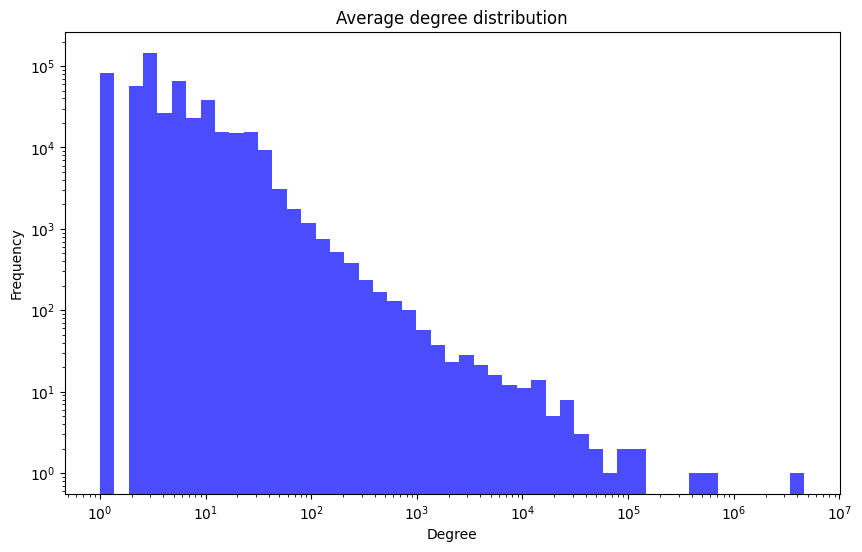

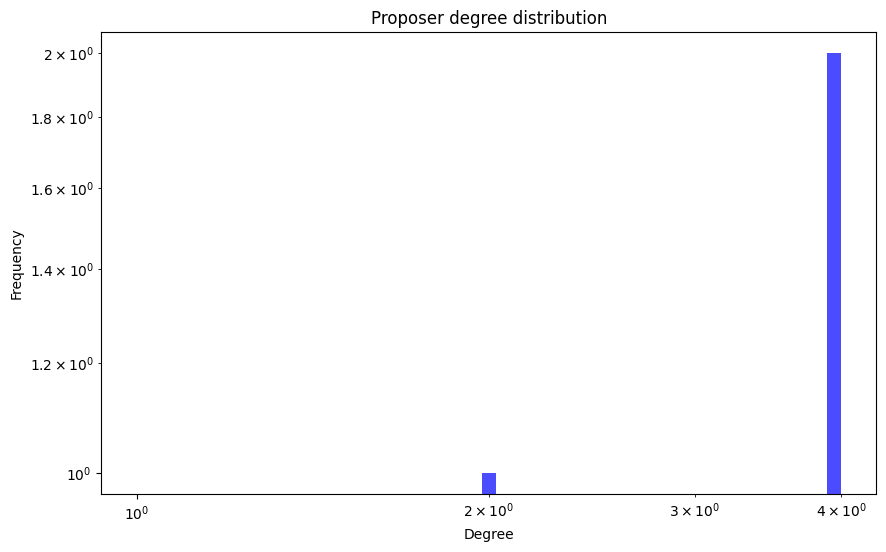

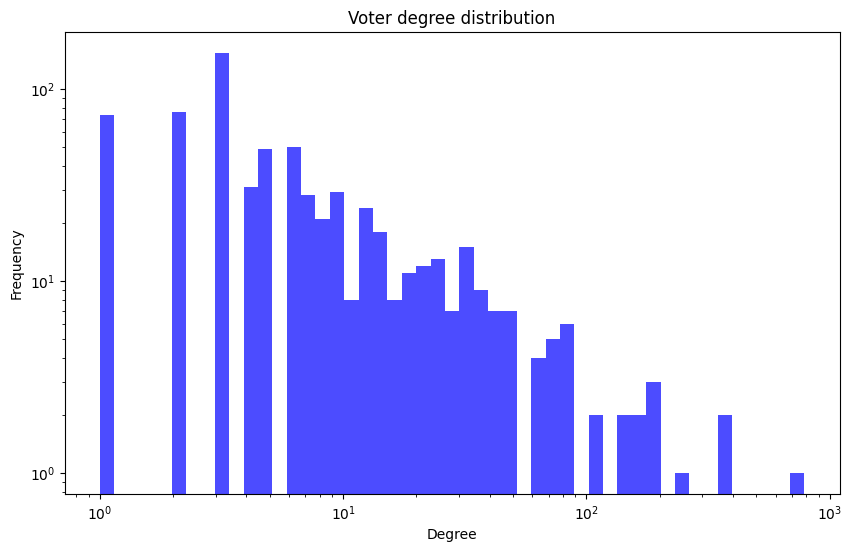

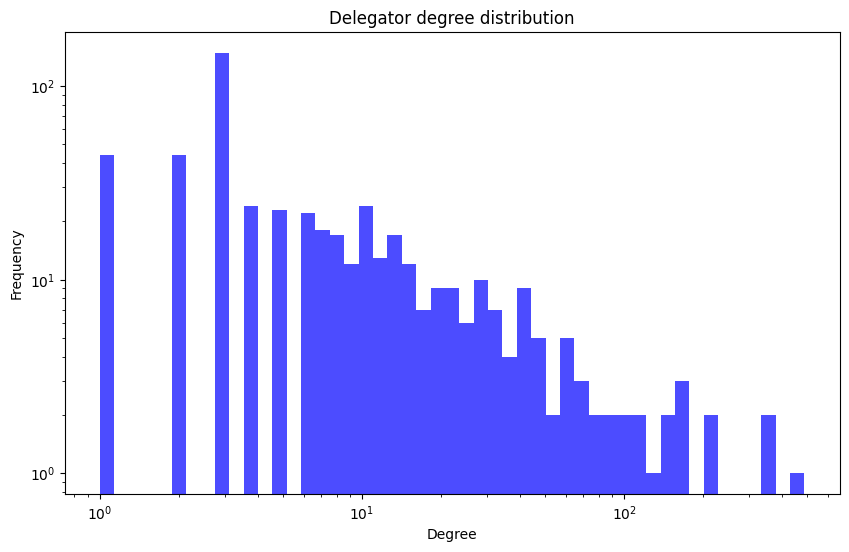

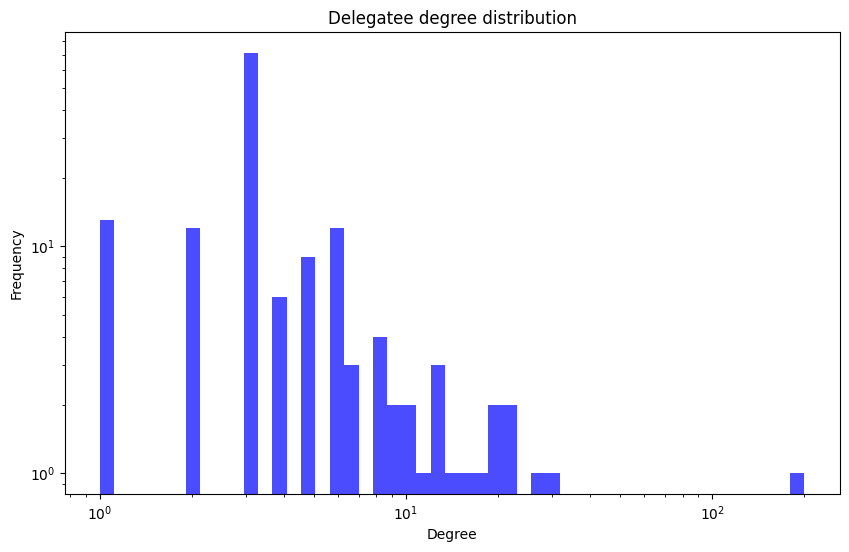

In [62]:
# Average
plt.figure(figsize=(10, 6))
plt.hist(average_degrees, bins=np.logspace(np.log10(1), np.log10(max(average_degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Average degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Proposers
plt.figure(figsize=(10, 6))
plt.hist(proposer_degrees, bins=np.logspace(np.log10(1), np.log10(max(proposer_degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Proposer degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Voters
plt.figure(figsize=(10, 6))
plt.hist(voter_degrees, bins=np.logspace(np.log10(1), np.log10(max(voter_degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Voter degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Delegates
plt.figure(figsize=(10, 6))
plt.hist(delegator_degrees, bins=np.logspace(np.log10(1), np.log10(max(delegator_degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Delegator degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(delegatee_degrees, bins=np.logspace(np.log10(1), np.log10(max(delegatee_degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Delegatee degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [ ]:
filtered_df = transfers_df[transfers_df['token'].isin(aave_trading_tokens)]

G_remaining_aave = nx.Graph()

for _, row in filtered_df.iterrows():
    node1, node2 = row['from'], row['to']
    value = row['value']
    
    if G_remaining_aave.has_edge(node1, node2):
        G_remaining_aave[node1][node2]['value'] += value
    else:
        G_remaining_aave.add_edge(node1, node2, value=value)
        
filtered_df = transfers_df[transfers_df['token'].isin(comp_trading_tokens)]

G_remaining_comp = nx.Graph()

for _, row in filtered_df.iterrows():
    node1, node2 = row['from'], row['to']
    value = row['value']
    
    if G_remaining_comp.has_edge(node1, node2):
        G_remaining_comp[node1][node2]['value'] += value
    else:
        G_remaining_comp.add_edge(node1, node2, value=value)

In [16]:
print(len(G_remaining_aave.edges), len(G_remaining_aave.nodes))
print(len(G_remaining_comp.edges), len(G_remaining_comp.nodes))

919872 501839
155795 155796


3.6660044356855486 501839


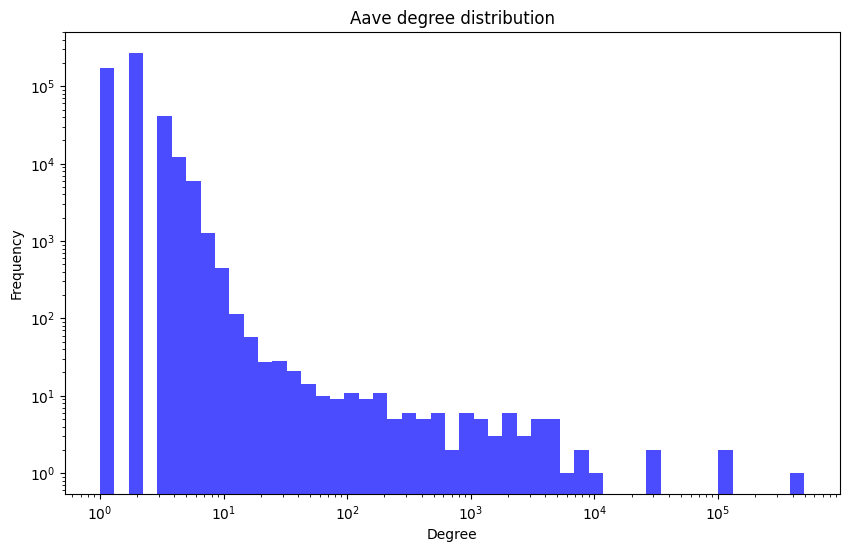

In [38]:
degrees = [G_remaining_aave.degree(n) for n in G_remaining_aave.nodes()]
print(np.average(degrees), len(degrees))

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Aave degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# degrees = [G_remaining_comp.degree(n) for n in G_remaining_comp.nodes()]
# print(np.average(degrees))

# plt.figure(figsize=(10, 6))
# plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('Compound degree distribution')
# plt.xlabel('Degree')
# plt.ylabel('Frequency')
# plt.show()

0.42857142857142855 21


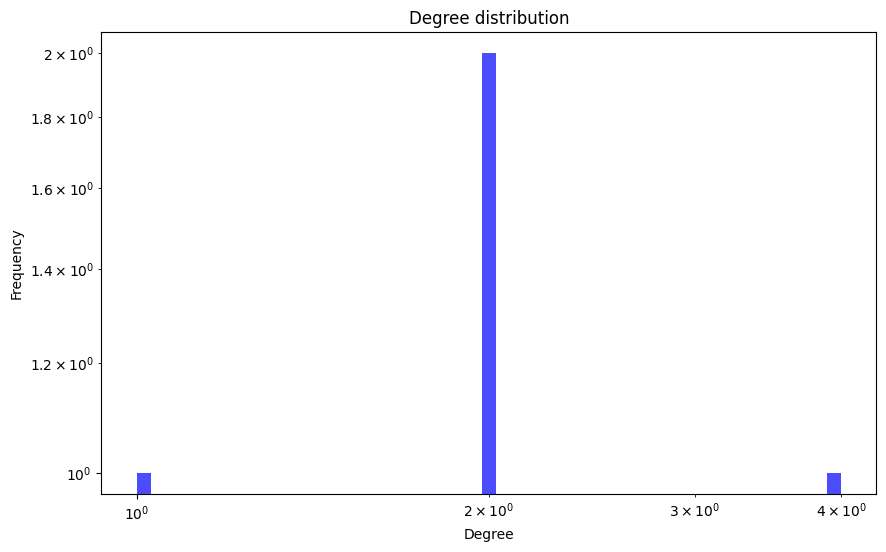

In [39]:
proposers = []

for proposal in aave_v3_proposals:
    creator = proposal['creator']
    if not creator in proposers:
        proposers.append(creator)

for proposal in aave_snapshot_proposals:
    author = proposal['author'].lower()
    if not author in proposers:
        proposers.append(author)
    
degrees = [G_remaining_aave.degree(n) for n in proposers]
degrees = [d if not isinstance(d, type(G_remaining_aave.degree())) else 0 for d in degrees]
# degrees = [d for d in degrees if not isinstance(d, type(G_remaining_aave.degree()))]
print(np.average(degrees), len(degrees))

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

1.174074074074074 1080


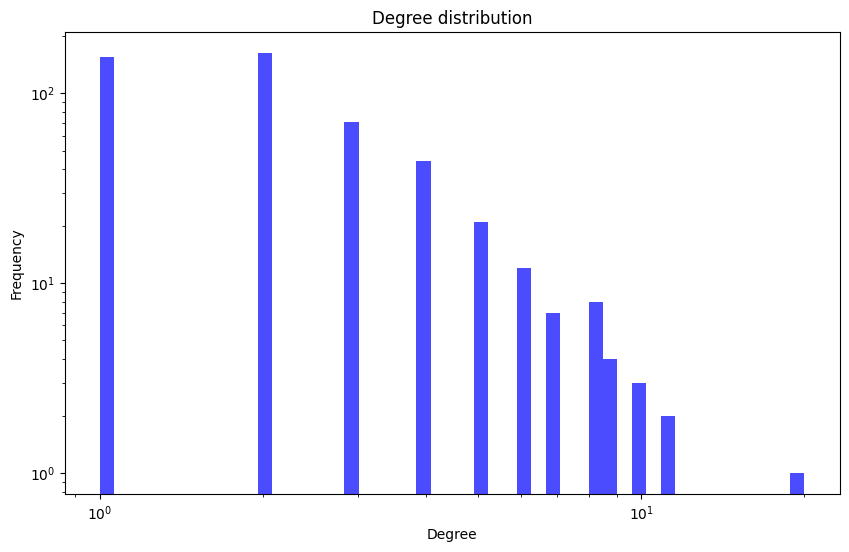

In [40]:
voters = []

for proposal in aave_snapshot_votes:
    for vote in proposal['votes']:
        voter = vote['voter'].lower()
        if not voter in voters:
            voters.append(voter)
    
degrees = [G_remaining_aave.degree(n) for n in voters]
degrees = [d if not isinstance(d, type(G_remaining_aave.degree())) else 0 for d in degrees]
# degrees = [d for d in degrees if not isinstance(d, type(G_remaining_aave.degree()))]
print(np.average(degrees), len(voters))

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

0.8742058449809402 1574


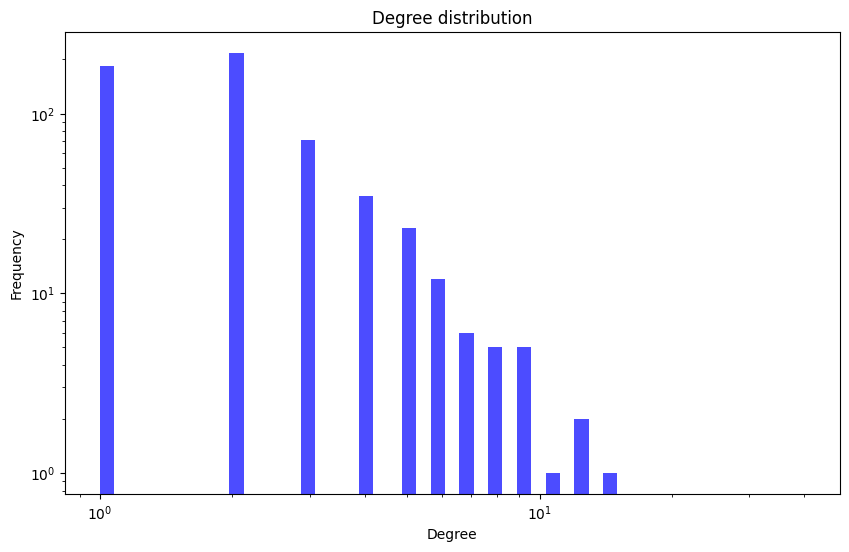

434.43565217391307 1150


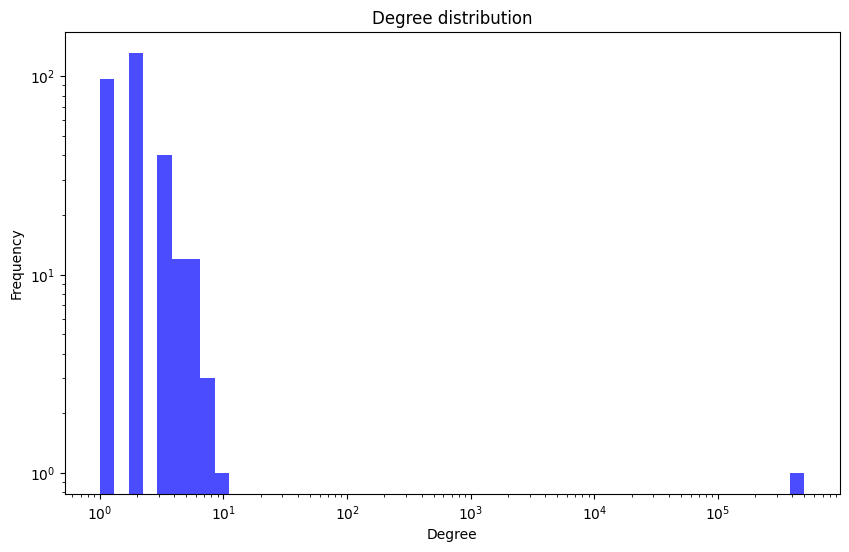

In [41]:
delegators = []
delegatees = []

for delegate in aave_delegations:
    delegator = delegate['delegator']
    delegatee = delegate['delegate']
    
    if not delegator in delegators:
        delegators.append(delegator)
        
    if not delegatee in delegatees:
        delegatees.append(delegatee)        
    
degrees = [G_remaining_aave.degree(n) for n in delegators]
degrees = [d if not isinstance(d, type(G_remaining_aave.degree())) else 0 for d in degrees]
# degrees = [d for d in degrees if not isinstance(d, type(G_remaining_aave.degree()))]
print(np.average(degrees), len(degrees))

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

degrees = [G_remaining_aave.degree(n) for n in delegatees]
degrees = [d if not isinstance(d, type(G_remaining_aave.degree())) else 0 for d in degrees]
# degrees = [d for d in degrees if not isinstance(d, type(G_remaining_aave.degree()))]
print(np.average(degrees), len(degrees))

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## Including proposals

In [ ]:
aave_prices = pd.read_csv('../data/aave/AAVE_daily_USD.csv')
aave_prices['date'] = pd.to_datetime(aave_prices['snapped_at'])

aave_v2_json = pd.DataFrame(aave_v2_proposals)
aave_v3_json = pd.DataFrame(aave_v3_proposals)

aave_csv['date'] = pd.to_datetime(aave_csv['date'])
aave_v2_json['date'] = pd.to_datetime(aave_v2_json['timestamp'], unit='s')
aave_v3_json['created_timestamp'] = aave_v3_json['transactions'].apply(lambda x: x.get('created', {}).get('timestamp'))
aave_v3_json['date'] = pd.to_datetime(aave_v3_json['created_timestamp'].astype(int), unit='s')

aave_csv_counts = aave_csv['date'].dt.date.value_counts().sort_index()
aave_v2_json_counts = aave_v2_json['date'].dt.date.value_counts().sort_index()
aave_v3_json_counts = aave_v3_json['date'].dt.date.value_counts().sort_index()

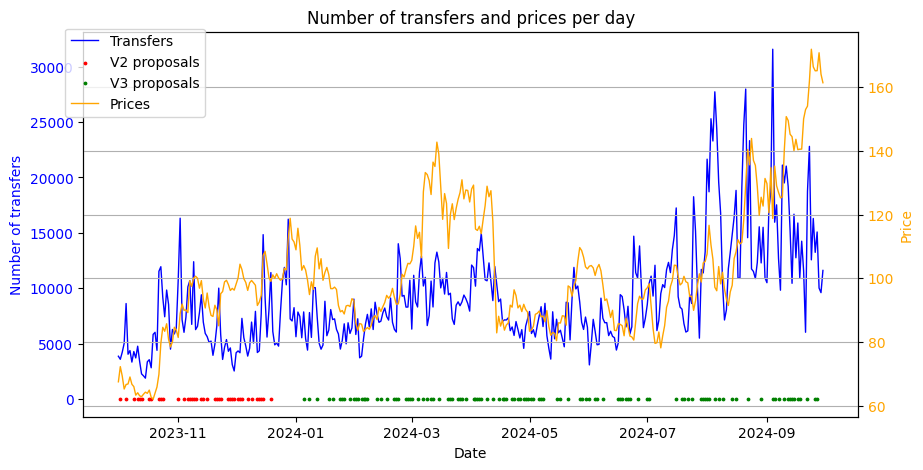

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(aave_csv_counts.index, aave_csv_counts.values, linewidth=1, label='Transfers', color='blue')
ax1.scatter(aave_v2_json_counts.index, aave_v2_json_counts.values, color='red', label='V2 proposals', s=3)
ax1.scatter(aave_v3_json_counts.index, aave_v3_json_counts.values, color='green', label='V3 proposals', s=3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of transfers', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(aave_prices['date'], aave_prices['price'], color='orange', linewidth=1, label='Prices')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ax3 = ax2.secondary_yaxis('right')
# ax3.plot(aave_prices['date'], aave_prices['market_cap'], linewidth=1, color='brown', label='Market Cap')
# ax3.set_ylabel('Market Cap', color='brown')
# ax3.tick_params(axis='y', labelcolor='brown')

# lines, labels = ax1.get_legend_handles_labels() + ax2.get_legend_handles_labels() + ax3.get_legend_handles_labels()
# fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Number of transfers and prices per day')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# plt.plot(aave_csv_counts.index, aave_csv_counts.values, linewidth=1, label='Transfers')
# plt.plot(aave_prices['date'], aave_prices['price'], color='red', linewidth=1, label='Prices')
# plt.scatter(aave_v2_json_counts.index, aave_v2_json_counts.values, color='red', label='V2 proposals', s=3)
# plt.scatter(aave_v3_json_counts.index, aave_v3_json_counts.values, color='green', label='V3 proposals', s=3)

# plt.xlabel('Date')
# plt.ylabel('Number of transfers')
# plt.title('Number of transfers per day')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.show()

# aave_daily_counts.plot(kind='line')
# plt.xlabel('Date')
# plt.ylabel('Number of transfers')
# plt.title('Number of Aave transfers per day')
# plt.xticks(rotation=45)
# # plt.legend(['Aave', 'Compound'])
# plt.grid()
# plt.show()

In [35]:
# comp_daily_counts = comp_filtered_transfers['date'].value_counts().sort_index()

with open('../data/proposals/compound/compound_proposals_1_year.json', 'r', encoding='utf8') as file:
    comp_proposals = json.load(file)['data']['proposals']
    
comp_json = pd.DataFrame(comp_proposals)

comp_csv['date'] = pd.to_datetime(comp_csv['date'])
comp_json['date'] = pd.to_datetime(comp_json['creationTime'], unit='s')

comp_csv_counts = comp_csv['date'].dt.date.value_counts().sort_index()
comp_json_counts = comp_json['date'].dt.date.value_counts().sort_index()

comp_prices = pd.read_csv('../data/compound/COMP_daily_USD.csv')
comp_prices['date'] = pd.to_datetime(comp_prices['snapped_at'])

C:\Users\Sam\AppData\Local\Temp\ipykernel_7448\1915608153.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_csv['date'] = pd.to_datetime(comp_csv['date'])
C:\Users\Sam\AppData\Local\Temp\ipykernel_7448\1915608153.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  comp_json['date'] = pd.to_datetime(comp_json['creationTime'], unit='s')


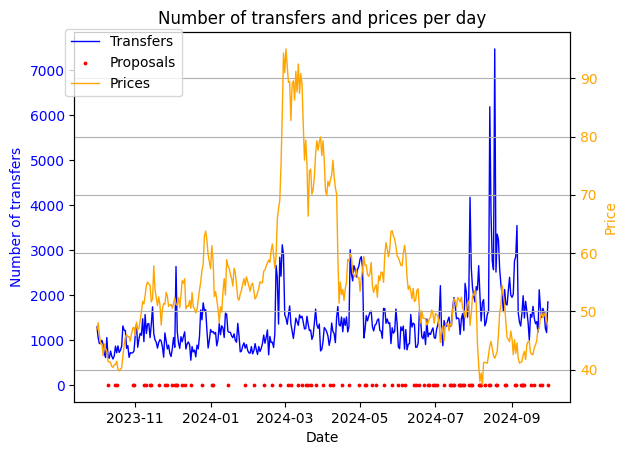

In [38]:
fig, ax1 = plt.subplots()

ax1.plot(comp_csv_counts.index, comp_csv_counts.values, linewidth=1, label='Transfers', color='blue')
ax1.scatter(comp_json_counts.index, comp_json_counts.values, color='red', label='Proposals', s=3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of transfers', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(comp_prices['date'], comp_prices['price'], color='orange', linewidth=1, label='Prices')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Number of transfers and prices per day')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# plt.plot(comp_csv_counts.index, comp_csv_counts.values, linewidth=1, label='Transfers')
# plt.scatter(comp_json_counts.index, comp_json_counts.values, color='red', label='Proposals', s=3)

# plt.xlabel('Date')
# plt.ylabel('Number of transfers')
# plt.title('Number of transfers per day')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.show()

# comp_daily_counts.plot(kind='line')
# plt.xlabel('Date')
# plt.ylabel('Number of transfers')
# plt.title('Number of Compound transfers per day')
# plt.xticks(rotation=45)
# # plt.legend(['Aave', 'Compound'])
# plt.grid()
# plt.show()